# Compute the Core-Collapse Fraction for UFDs

In [1]:
from sashimi_si import *
import matplotlib.pyplot as plt

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size']  = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size']  = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size']  = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size']  = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction']   = 'in'
plt.rcParams['ytick.direction']   = 'in'
plt.rcParams['xtick.major.pad']   = 8
plt.rcParams['xtick.top']         = True
plt.rcParams['ytick.right']       = True

## Specify SIDM Properties
Now we specify the SIDM properties for one example with $\sigma_0/m_\chi = 147.1~\mathrm{cm^{2}~g^{-1}}$ and $w = 24.33~\mathrm{km~s^{-1}}$. As parameters for the (host)halo we take $M_{\rm UFD} = 10^9\, M_\odot$.

In [29]:
sh = subhalo_properties(sigma0_m=147.1,w=24.33)
M0 = 1.e10*sh.Msun 

ma200, z_acc, rsCDM_acc, rhosCDM_acc, rmaxCDM_acc, VmaxCDM_acc, rsSIDM_acc, rhosSIDM_acc, rcSIDM_acc, rmaxSIDM_acc, VmaxSIDM_acc, m_z0, rsCDM_z0, rhosCDM_z0, rmaxCDM_z0, VmaxCDM_z0, rsSIDM_z0, rhosSIDM_z0, rcSIDM_z0, rmaxSIDM_z0, VmaxSIDM_z0, ctCDM_z0, tt_ratio, weightCDM, weightSIDM, surviveCDM, surviveSIDM = sh.subhalo_properties_calc(M0,redshift=0.,M0_at_redshift=True,dz=0.01,N_herm=20,zmax=5.,logmamin=4,N_ma=500)

Calculating subhalo properties: 100%|██████████| 187/187 [00:28<00:00,  6.65it/s]


## Subhalo Mass Function
Now let us find the subhalo mass function, including the fraction of core-collapsed halos

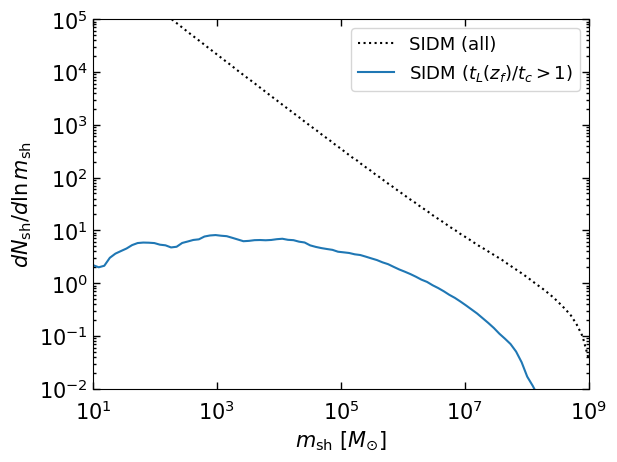

In [10]:
condition = weightSIDM>0.
q = m_z0[condition]/sh.Msun
N,lnx_edges = np.histogram(np.log(q),weights=weightSIDM[condition],bins=100)
lnx = (lnx_edges[1:]+lnx_edges[:-1])/2.
x = np.exp(lnx)
dlnx = lnx_edges[1:]-lnx_edges[:-1]
dNdlnx = N/dlnx
plt.loglog(x,dNdlnx,':',c='k',label='SIDM (all)')

condition = (weightSIDM>0.)*(tt_ratio>1.)
q = m_z0[condition]/sh.Msun
N,lnx_edges = np.histogram(np.log(q),weights=weightCDM[condition],bins=100)
lnx = (lnx_edges[1:]+lnx_edges[:-1])/2.
x = np.exp(lnx)
dlnx = lnx_edges[1:]-lnx_edges[:-1]
dNdlnx = N/dlnx
plt.loglog(x,dNdlnx,'-',label=r'SIDM ($t_L(z_f)/t_c>1$)')

plt.ylim(1e-2,1e5)
plt.xlim(1e1,1e9)
plt.legend(fontsize=13)
plt.xlabel(r'$m_{\rm sh} \ [M_{\odot}]$')
plt.ylabel(r'$dN_{\rm sh}/d\ln m_{\rm sh}$')
plt.show()

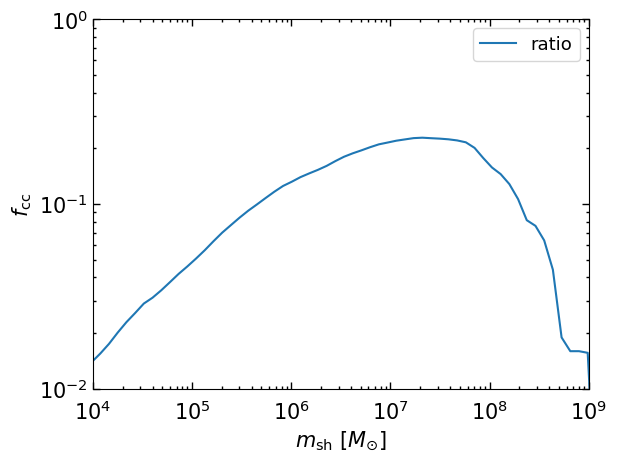

In [30]:
binsC = np.linspace(1, 21, 100)

conditionall = weightSIDM>0.
qall = m_z0[conditionall]/sh.Msun
Nall,lnx_edges_all = np.histogram(np.log(qall),weights=weightSIDM[conditionall],bins=binsC)

conditioncc = (weightSIDM>0.)*(tt_ratio>1.)
qcc = m_z0[conditioncc]/sh.Msun
Ncc,lnx_edges_cc = np.histogram(np.log(qcc),weights=weightCDM[conditioncc],bins=binsC)

lnx = (lnx_edges_cc[1:]+lnx_edges_cc[:-1])/2
dlnx = lnx_edges_cc[1:]-lnx_edges_cc[:-1]
x = np.exp(lnx)

ratio = np.divide(Ncc, Nall, out=np.zeros_like(Ncc, dtype=float), where=Nall != 0)
plt.loglog(x,ratio,'-',label='ratio')
plt.ylim(1e-2,1e0)
plt.xlim(1e4,1e9)
plt.legend(fontsize=13)
plt.xlabel(r'$m_{\rm sh} \ [M_{\odot}]$')
plt.ylabel(r'$f_{\rm cc}$')
plt.show()